### 1. 문제정의(목표설정)
- 타이타닉 데이터를 학습해서 생존자와 사망자를 예측해보자!
- 머신러닝 전체 과정을 진행해보자!

### 2. 데이터 수집(Kaggle 사이트에서 로드)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('data/train.csv', index_col= 'PassengerId') 
test = pd.read_csv('data/test.csv' ,index_col = 'PassengerId')

In [3]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [4]:
# 정답 컬럼이 추가되있어서 train 컬럼이 하나 더 많음
train.shape, test.shape

((891, 11), (418, 10))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


- 결측치가 있는 컬럼
 - train : Age, Cabin, Embarked
 - test : Age, Fare, Cabin

In [7]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [8]:
train['Cabin']

PassengerId
1       NaN
2       C85
3       NaN
4      C123
5       NaN
       ... 
887     NaN
888     B42
889     NaN
890    C148
891     NaN
Name: Cabin, Length: 891, dtype: object

In [9]:
train['Cabin'].describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [10]:
train[train['Cabin']=='G6']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S
395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S


In [11]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [12]:
# Embaked 컬럼에서 S 값을 가지는 승객들을 출력해보세요!
train[train['Embarked']=='S']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


In [13]:
# 데이터프레임 전체 행 보기
# pd.set_option('display.max_rows', None)  # None : 무제한 출력(개수를 쓰면 해당 개수 만큼만 표시됨)

In [14]:
train[train['Embarked']=='S']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


In [15]:
# 데이터프레임 전체 컬럼 보기
# pd.set_option('display.max_columns', None)

In [16]:
# 데이터프레임 옵션 설정 초기화
# pd.reset_option('display')

In [17]:
test['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [18]:
test['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [19]:
test['Cabin'].describe()

count                  91
unique                 76
top       B57 B59 B63 B66
freq                    3
Name: Cabin, dtype: object

### 3. 데이터 전처리
- 결측치가 있는 컬럼
- train : Age, Cabin, Embarked
- test : Age, Fare, Cabin

#### Age 컬럼의 결측치를 채워보자!
- 나이는 전체 평균으로 넣기에는 범위가 너무 넓고 데이터의 분포도가 약간 치우쳐져 있음
- 다른 컬럼들과의 상관관계를 이용해 결측치를 좀 더 상세하게 채워보자!

In [20]:
# 상관관계 : 각 특성들간의 영향도를 수치로 파악할 수 있음(범위 : -1(반비례)~1(비례))
# 절대값이 클수록 영향도가 높아짐
train.corr()   # 수치형 데이터들만 출력

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


- Age컬럼과 상관관계가 높은 Pclass를 활용해보자!
- 생존에 관련이 많았던 성별 컬럼을 함께 활용해보자!

In [21]:
# 피벗테이블 : 컬럼들의 요약된 정보를 출력할 수 있는 테이블 형태
pt1 = train.pivot_table(values='Age', # 데이터로 사용될 컬럼을 지정
                        # 멀티인덱스 설정(Pclass로 나눈 후에 Sex로 한번 더 나눠서 표시)
                        index=['Pclass','Sex'], 
                        # 데이터 요약시 사용하는 함수를 지정
                        aggfunc='mean'  # (mean : 평균, sum : 합계, count : 개수)
                       ) 
pt1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [22]:
# 멀티 인덱싱    
pt1.loc[1, 'female']    # 좌측 행, 우측 열

Age    34.611765
Name: (1, female), dtype: float64

In [23]:
# null값이 있는 행을 판단하는 명령 (있으면 True, 없으면 False)
pd.isna(train['Age'])   # 수치형, 문자형 데이터 모두 판단

# np.isna(train['Age'])  # 수치형 데이터만 판단
# train['Age'].isnull()   # 수치형, 문자형 데이터 모두 판단

PassengerId
1      False
2      False
3      False
4      False
5      False
       ...  
887    False
888    False
889     True
890    False
891    False
Name: Age, Length: 891, dtype: bool

- Age컬럼의 결측치를 채워주는 함수를 만들어서 apply명령으로 한번에 적용시켜버리자!

In [24]:
def fill_age(data) : # 매개변수 data에는 train 혹은 test가 들어가게 됨
    # 만약 Age컬럼에 결측치가 있다면 피벗테이블에서 값을 가져오고 
    if pd.isna(data['Age']) : 
        # 위에서 만든 피벗테이블에서 멀티인덱싱한 값을 리턴!
        return pt1.loc[data['Pclass'], data['Sex']]
    # Age 컬럼에 결측치가 없다면 원래 나이값을 그대로 사용하자!
    else :
        return data['Age']   # 원래 Age 컬럼에 있는 값 그대로 적용!

In [25]:
# apply : 데이터프레임에서 행 또는 열에 한번에 복잡한 계산을 적용하고 싶을때 사용하는 명령
# astype : 데이터의 타입을 변경시켜 줌(나이는 실수가 아닌 정수로 표기)
train['Age'] = train.apply(fill_age, axis=1).astype('int64')

In [26]:
test['Age'] = test.apply(fill_age, axis=1).astype('int64')

# 가장 좋은건 train, test 데이터가 합쳐져 있을 경우 피벗테이블 값을 적용하는게 좋으나 train,test가 
# 사전에 나뉘어져 있었고 각각의 값들의 큰 차이가 없었으며 train 데이터의 개수가 많기 때문에 train데이터의 
# 피벗 테이블을 기준으로 둘 다 적용시켜줌

#### Embarked 채우기!
- train 데이터의 Embarked 컬럼은 결측치가 2개 밖에 없네!

In [27]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
# fillna : 지정값으로 결측치를 전부 채워주는 명령
train['Embarked'] = train['Embarked'].fillna('S')

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


### Fare 채우기

In [30]:
test['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

- Fare 컬럼도 최대, 최소값에 비해 평균이 최소값쪽으로 쏠려 있음
- 무작정 전체 평균값으로 계산하기에는 신뢰성이 떨어질 것 같음

In [31]:
test.corr()

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.520540,0.001087,0.018721,-0.577147
Age,-0.520540,1.000000,-0.084936,-0.062898,0.348593
SibSp,0.001087,-0.084936,1.000000,0.306895,0.171539
Parch,0.018721,-0.062898,0.306895,1.000000,0.230046
Fare,-0.577147,0.348593,0.171539,0.230046,1.000000


In [32]:
pt2 = test.pivot_table(values='Fare', 
                        index=['Pclass','Sex'], 
                        aggfunc='mean'  
                       ) 
pt2

Fare
Pclass Sex               
1      female  115.591168
       male     75.586551
2      female   26.438750
       male     20.184654
3      female   13.735129
       male     11.826350

In [33]:
test['Fare'].isnull()

PassengerId
892     False
893     False
894     False
895     False
896     False
        ...  
1305    False
1306    False
1307    False
1308    False
1309    False
Name: Fare, Length: 418, dtype: bool

In [34]:
# 불리언 인덱싱으로 비어있는 Fare 컬럼의 행을 찾아보자!
# 불리언 인덱싱은 true, false로 판단할 수 있는 조건으로만 설정
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60,0,0,3701,NaN,NaN,S


In [35]:
test['Fare'] = test['Fare'].fillna(11.826350)

In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


#### Cabin 컬럼 채우기
- Cabin 컬럼은 실제데이터보다 결측치가 더 많음(컬럼 자체를 삭제시키는 것도 한 방법이 될 수 있음)
- 일단은 결측치에 임의값을 넣고 시각화까지 해서 판단해봅시다!

In [38]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

- Cabin 컬럼은 데이터의 개수에 비해 유니크값이 너무 많음(데이터가 얕고 넓게 분포되어 있는 느낌)
- 객실 번호 컬럼에서 각각의 숫자값이 큰 의미가 있을까?
- 앞에 영문자는 일정한 구역이나 층을 의미하지 않을까?
- -> 앞에 영문자만 따와서 활용을 해보자!

In [39]:
# train, test 데이터에서 Cabin 컬럼의 결측치들을 임의의 문자 M으로 채운후 새로운 Deck 컬럼 생성
train['Deck'] = train['Cabin'].fillna('M')
test['Deck'] = test['Cabin'].fillna('M')

In [40]:
train['Deck']

PassengerId
1         M
2       C85
3         M
4      C123
5         M
       ... 
887       M
888     B42
889       M
890    C148
891       M
Name: Deck, Length: 891, dtype: object

In [41]:
# Deck 컬럼에서 맨 앞의 영문자만 인덱싱
train['Deck'] = train['Deck'].str[0]
test['Deck'] = test['Deck'].str[0]

In [42]:
train['Deck']

PassengerId
1      M
2      C
3      M
4      C
5      M
      ..
887    M
888    B
889    M
890    C
891    M
Name: Deck, Length: 891, dtype: object

In [43]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
 11  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 90.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non

In [44]:
# train, test 데이터에서 기존에 있던 Cabin 컬럼을 지워보자!

# drop : 행과 열을 모두 삭제할 수 있는 명령(행:axis=0, 열:axis=1)
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

# del : 열(컬럼)만 삭제하는 명령
# del train['Cabin']

In [45]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non

### 4. 탐색적 데이터 분석

#### Deck 컬럼 시각화

In [46]:
# groupby : 그룹별로 데이터를 집계, 요약해주는 명령(그룹으로 묶어서 인덱스로 설정)
train_deck = train[['Deck','Survived','Name']].groupby(['Deck','Survived']).count()
train_deck

# 위와 같은 결과를 출력하는 코드
#train.pivot_table(value='Name',
#                  index=['Deck'.'Survived'],
#                  aggfunc='count')

Name
Deck Survived      
A    0            8
     1            7
B    0           12
     1           35
C    0           24
     1           35
D    0            8
     1           25
E    0            8
     1           24
F    0            5
     1            8
G    0            2
     1            2
M    0          481
     1          206
T    0            1

In [47]:
# seaborn : 시각화 라이브러리
# -> matplotlib에 비해 색상이 좀 더 깔끔하고 그래프를 그리는 기본 성능이 좋음
# -> pandas와 호환성이 좋음

import seaborn as sns

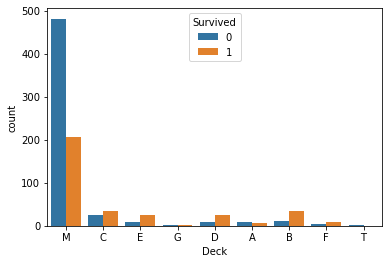

In [48]:
# countplot : 데이터의 개수를 출력해주는 차트
sns.countplot(data=train,
              x='Deck',    # x축에 Deck 컬럼의 유니크값들이 들어가서 출력됨
              hue = 'Survived'  # unique값에 대한 각각의 bar 차트가 생성되고 범례도 표시
             );

- M(원래 결측치가 있었던 데이터)에서 상대적으로 사망한 사람들의 비율이 월등히 높음!
- 생존 여부를 판단하는데 활용해도 괜찮겠구나!

### Pclass 컬럼 시각화

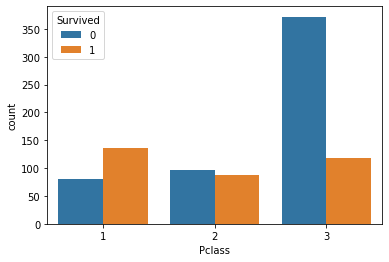

In [49]:
sns.countplot(data=train,
              x='Pclass',    
              hue = 'Survived'
             );

- 아.. Pcalss가 3등급이면 많이 가는구나..

#### Deck과 Pclass 컬럼을 같이 시각화!

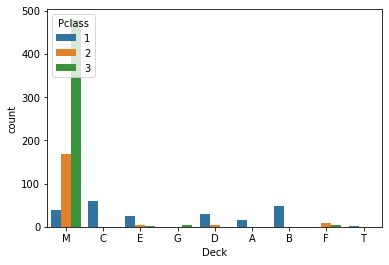

In [50]:
sns.countplot(data=train,
              x='Deck',    
              hue = 'Pclass'
             );

- M 객실(결측치)에 머문 승객들이 3등급인 경우가 많았음!

#### Sex, Embarked 컬럼을 시각화 해보자!

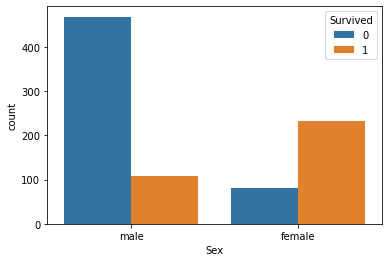

In [51]:
# Sex 컬럼과 Survived 대해서 countplot으로 출력해보세요~!
sns.countplot(data=train,
              x='Sex',
              hue='Survived'
             );

- 남자가 많이 사망했구나..ㅠ

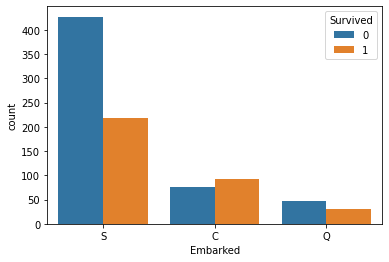

In [52]:
# Embarked 컬럼과 Survived 대해서 countplot으로 출력해보세요~!
sns.countplot(data=train,
              x='Embarked',
              hue='Survived'
             );

- 승선 항구가 S인 곳에서 탑승한 사람들이 많았고 사망한 사람들의 비율도 높았음!

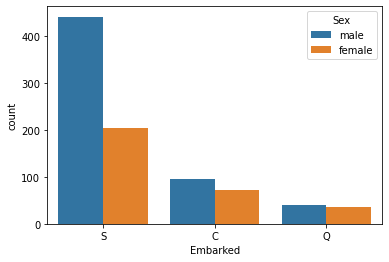

In [53]:
sns.countplot(data=train,
              x='Embarked',
              hue='Sex'
             );

- 탑승항구가 S인 곳에서 탑승한 남성의 비율이 높음!

#### Age 컬럼 시각화

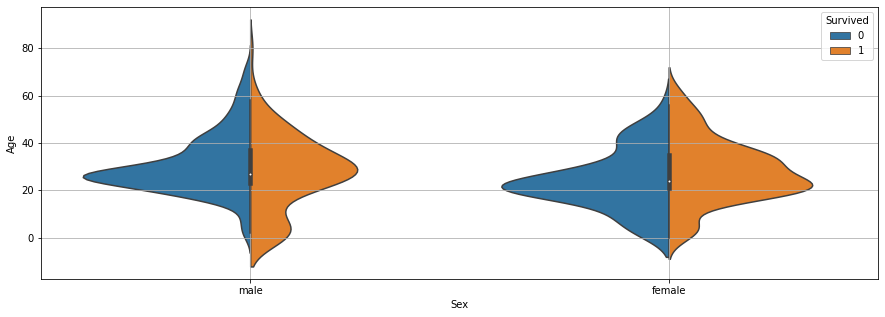

In [54]:
# 전체 그래프의 가로, 세로 크기 설정
plt.figure(figsize=(15,5))

# violinplot : 바이올린 형태로 데이터의 분포와 밀도를 보기 쉽게 곡선으로 표현한 그래프
# 데이터가 많이 분포하는 부분은 두껍게, 적게 분포하는 부분은 얇게!
sns.violinplot(data=train,
               x='Sex',
               y='Age',
               hue='Survived',
               split=True    # True 일 경우 두 그룹을 하나로 합쳐서 표시
              )

plt.grid()

# 수치값(실수)과 같이 연속된 데이터의 경우 모든 유니크값을 표시하기가 
# 어렵고 보기가 힘들기 때문에 곡선 형태의 바이올린 플롯으로 표시해볼 수 있음
# bar 차트로 표시하고자 한다면 범위와 구간을 설정해줘야하는 번거로움이 있음

# 바이올린플롯은 데이터의 밀도를 확률적으로 나타내는 방식으로 그래프를 표시

- 20~30대의 탑승자가 많았고 사망자도 많았음!
- 20대 미만의 어린아이중에서는 남자가 여자에 비해서 많이 살았음!
- 아이들에게는 성별이 생존여부에 큰 영향을 미치는 것 같지는 않네!

### Fare 컬럼 시각화

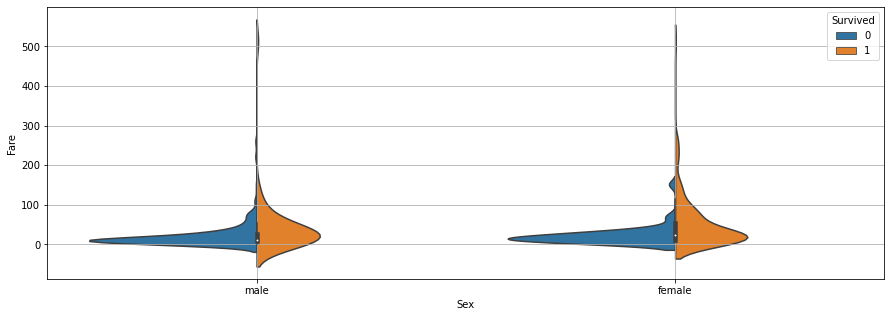

In [55]:
plt.figure(figsize=(15,5))


sns.violinplot(data=train,
               x='Sex',
               y='Fare',
               hue='Survived',
               split=True    
              )

plt.grid()

- 요금이 저렴한 사람들이 상대적으로 많이 사망했구나!

#### Parch - 함께 탑승한 부모자식의 수
#### SibSp - 함께 탑승한 형제자매, 배우자의 수

- Parch와 SibSp를 더해서 전체 가족의 숫자라는 새로운 컬럼을 생성해보자!

In [56]:
# 전체 가족의 숫자라는 새로운 컬럼을 생성
train['Family_size'] = train['Parch'] + train['SibSp'] + 1
test['Family_size'] = test['Parch'] + test['SibSp'] + 1

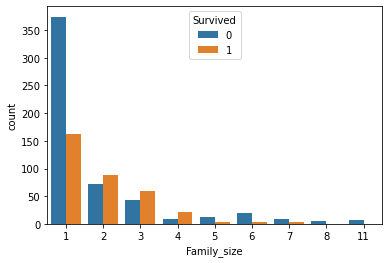

In [57]:
sns.countplot(data=train,
              x='Family_size',
              hue='Survived'
             );

- 1명일때는 사망 비율이 높고, 2~4명 일때는 생존비율이 높고, 5명 이상이면 사망 비율이 높구나!


- 가족사이즈가 1이면 Alone, 2~4면 small, 5이상이면 Large 3가지로 범주화 시켜서 만들어보자!

In [58]:
bins_size = [0, 1, 4, 11]   # 시작값 포함 X, 끝값 포함 O
labels_size = ['Alone', 'Small', 'Large']

# 전체 가족의 숫자를 범주화 하여 Family_Group 컬럼을 새로 생성
# bins : 범주의 경계를 지정
# labels : 범주의 명칭을 지정
train['Family_Group'] = pd.cut(train['Family_size'], bins=bins_size, labels=labels_size)
test['Family_Group'] = pd.cut(test['Family_size'], bins=bins_size, labels=labels_size)

In [59]:
train['Family_size']

PassengerId
1      2
2      2
3      1
4      2
5      1
      ..
887    1
888    1
889    4
890    1
891    1
Name: Family_size, Length: 891, dtype: int64

In [60]:
train['Family_Group']

PassengerId
1      Small
2      Small
3      Alone
4      Small
5      Alone
       ...  
887    Alone
888    Alone
889    Small
890    Alone
891    Alone
Name: Family_Group, Length: 891, dtype: category
Categories (3, object): ['Alone' < 'Small' < 'Large']

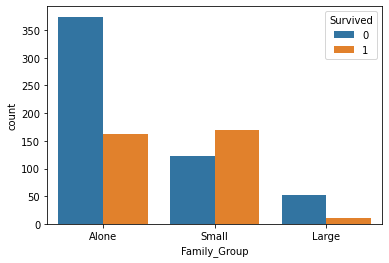

In [61]:
sns.countplot(data=train,
              x='Family_Group',
              hue='Survived'
             );

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Name          891 non-null    object  
 3   Sex           891 non-null    object  
 4   Age           891 non-null    int64   
 5   SibSp         891 non-null    int64   
 6   Parch         891 non-null    int64   
 7   Ticket        891 non-null    object  
 8   Fare          891 non-null    float64 
 9   Embarked      891 non-null    object  
 10  Deck          891 non-null    object  
 11  Family_size   891 non-null    int64   
 12  Family_Group  891 non-null    category
dtypes: category(1), float64(1), int64(6), object(5)
memory usage: 123.8+ KB


#### Text 데이터 다루기!(Name 컬럼)
- 호칭들만 추출해서 확인해보자!

In [63]:
train['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [64]:
train['Name'][1]

'Braund, Mr. Owen Harris'

In [65]:
train['Name'][1].split(',')[1]

' Mr. Owen Harris'

In [66]:
train['Name'][1].split(',')[1].split('.')[0]

' Mr'

In [67]:
train['Name'][1].split(',')[1].split('.')[0].strip()

'Mr'

In [68]:
def split_name(data) :
    return data.split(',')[1].split('.')[0].strip()

In [69]:
train['Title'] = train['Name'].apply(split_name)
test['Title'] = test['Name'].apply(split_name)

# train.apply라면 train은 데이터프레임(2차원) 이라서 axis 설정을 해줘야 하지만
# train['Name']이라면 컬럼(시리즈 형태의 1차원) 이라서 aixs 설정을 해줄 필요가 없음

In [70]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [71]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

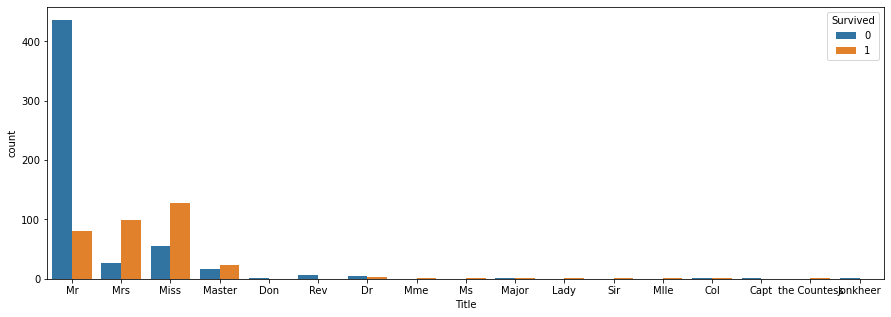

In [72]:
plt.figure(figsize=(15,5))

sns.countplot(data=train,
              x= 'Title',
              hue = 'Survived'
             );

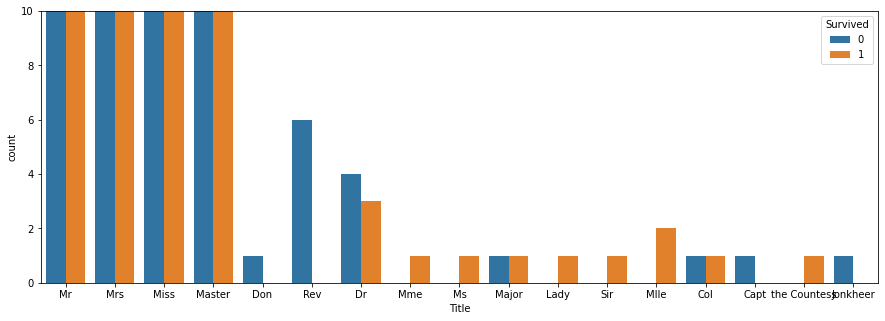

In [73]:
plt.figure(figsize=(15,5))
plt.ylim(0,10) # y축 출력 범위 설정
sns.countplot(data=train,
              x= 'Title',
              hue = 'Survived'
             );

- 목사님(Rev)들은 전부 돌아가심..

- Mr, Mrs, Miss, Master, Rev를 제외한 호칭들은 상대적으로 개수가 적기 때문에
  Other로 묶어주자!

In [74]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [75]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [76]:
# train['Title'] 컬럼의 유니크값들을 그대로 복사해서 title이라는 리스트에 담기
# Don과 Rev의 순서를 바꿔주기(zip 함수 사용시 순서를 맞춰주기 위해서)
title = ['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 'Don', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer']
title

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Rev',
 'Don',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'the Countess',
 'Jonkheer']

In [77]:
len(title)

17

In [78]:
# 중요한 5가지 호칭들은 그대로 사용하고 나머지는 Other로 변환하여 리스트에 저장
convert_title = ['Mr', 'Mrs', 'Miss', 'Master', 'Rev'] + ['Other']*12
convert_title

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Rev',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other']

In [79]:
len(convert_title)

17

In [80]:
# dict(zip()) 함수를 사용하여 리스트 형태인 title과 convert_title을 차례대로
# key값(title), value(convert_title) 값으로 만드는 딕셔너리를 생성

title_dict = dict(zip(title,convert_title))
title_dict 

{'Mr': 'Mr',
 'Mrs': 'Mrs',
 'Miss': 'Miss',
 'Master': 'Master',
 'Rev': 'Rev',
 'Don': 'Other',
 'Dr': 'Other',
 'Mme': 'Other',
 'Ms': 'Other',
 'Major': 'Other',
 'Lady': 'Other',
 'Sir': 'Other',
 'Mlle': 'Other',
 'Col': 'Other',
 'Capt': 'Other',
 'the Countess': 'Other',
 'Jonkheer': 'Other'}

In [81]:
# title_dict를 통해서 실제 Title 컬럼을 변경시켜주기(key값 -> value값)

train['Title'] = train['Title'].map(title_dict)

In [82]:
# head() : 위에서 부터 정해진 개수만큼 출력
# tail() : 아래에서 부터 정해진 개수만큼 출력

train['Title'].tail(70)

PassengerId
822        Mr
823     Other
824       Mrs
825    Master
826        Mr
        ...  
887       Rev
888      Miss
889      Miss
890        Mr
891        Mr
Name: Title, Length: 70, dtype: object

In [83]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

- test[Title]에는 train에는 없는 Dona 라는 호칭이 있기 때문에 title_dict에 Dona에 대한 부분을 추가해 주기

In [84]:
# 딕셔너리에 Dona라는 키값과 Other 라는 value값을 추가해줌
title_dict['Dona'] = 'Other'
title_dict

{'Mr': 'Mr',
 'Mrs': 'Mrs',
 'Miss': 'Miss',
 'Master': 'Master',
 'Rev': 'Rev',
 'Don': 'Other',
 'Dr': 'Other',
 'Mme': 'Other',
 'Ms': 'Other',
 'Major': 'Other',
 'Lady': 'Other',
 'Sir': 'Other',
 'Mlle': 'Other',
 'Col': 'Other',
 'Capt': 'Other',
 'the Countess': 'Other',
 'Jonkheer': 'Other',
 'Dona': 'Other'}

In [85]:
# Dona의 호칭을 가지는 승객을 불리언 인덱싱으로 확인!
test[test['Title']=='Dona']

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Family_size,Family_Group,Title
PassengerId,,,,,,,,,,,,,
1306,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9,C,C,1,Alone,Dona


In [86]:
test['Title'] = test['Title'].map(title_dict)
test['Title']

PassengerId
892         Mr
893        Mrs
894         Mr
895         Mr
896        Mrs
         ...  
1305        Mr
1306     Other
1307        Mr
1308        Mr
1309    Master
Name: Title, Length: 418, dtype: object

In [87]:
test['Title'].describe()

count     418
unique      6
top        Mr
freq      240
Name: Title, dtype: object

#### 필요없는 컬럼 삭제하기( Ticket,Name,SibSp,Parch,Family_size)

In [88]:
train['Ticket']

PassengerId
1             A/5 21171
2              PC 17599
3      STON/O2. 3101282
4                113803
5                373450
             ...       
887              211536
888              112053
889          W./C. 6607
890              111369
891              370376
Name: Ticket, Length: 891, dtype: object

In [89]:
train.drop('Ticket', axis=1 , inplace=True)
test.drop('Ticket', axis=1 , inplace=True)

train.drop('Name', axis=1 , inplace=True)
test.drop('Name', axis=1 , inplace=True)

train.drop('SibSp', axis=1 , inplace=True)
test.drop('SibSp', axis=1 , inplace=True)

train.drop('Parch', axis=1 , inplace=True)
test.drop('Parch', axis=1 , inplace=True)

train.drop('Family_size', axis=1 , inplace=True)
test.drop('Family_size', axis=1 , inplace=True)

In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Sex           891 non-null    object  
 3   Age           891 non-null    int64   
 4   Fare          891 non-null    float64 
 5   Embarked      891 non-null    object  
 6   Deck          891 non-null    object  
 7   Family_Group  891 non-null    category
 8   Title         891 non-null    object  
dtypes: category(1), float64(1), int64(3), object(4)
memory usage: 95.9+ KB


In [91]:
train

,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,Family_Group,Title
PassengerId,,,,,,,,,
1,0,3,male,22,7.2500,S,M,Small,Mr
2,1,1,female,38,71.2833,C,C,Small,Mrs
3,1,3,female,26,7.9250,S,M,Alone,Miss
4,1,1,female,35,53.1000,S,C,Small,Mrs
5,0,3,male,35,8.0500,S,M,Alone,Mr
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27,13.0000,S,M,Alone,Rev
888,1,1,female,19,30.0000,S,B,Alone,Miss
889,0,3,female,21,23.4500,S,M,Small,Miss


In [92]:
# iloc로 분리
# y_train =train.iloc[ : , 0]
# X_train= train.iloc[:, 1:]

In [93]:
# loc로 분리
# y_train = train.loc[ : , 'Survived']
# X_train = train.loc[ : ,'Pclass':'Title']

### 5. 모델링(가공, 선택, 학습, 평가)

- 문제, 정답 데이터로 분리!

In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Sex           891 non-null    object  
 3   Age           891 non-null    int64   
 4   Fare          891 non-null    float64 
 5   Embarked      891 non-null    object  
 6   Deck          891 non-null    object  
 7   Family_Group  891 non-null    category
 8   Title         891 non-null    object  
dtypes: category(1), float64(1), int64(3), object(4)
memory usage: 95.9+ KB


In [95]:
# train 데이터에서 정답 컬럼
y_train = train['Survived']
# train 데이터에서 정답 컬럼(Survived)을 삭제한 후 남은 모든 컬럼들
X_train = train.drop('Survived', axis=1)
# 맨 처음에 받았던 test.csv를 가공한 test를 그대로 넣어주면 됨
X_test = test

In [96]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Deck', 'Family_Group',
       'Title'],
      dtype='object')

In [97]:
X_test.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Deck', 'Family_Group',
       'Title'],
      dtype='object')

In [98]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Sex           891 non-null    object  
 3   Age           891 non-null    int64   
 4   Fare          891 non-null    float64 
 5   Embarked      891 non-null    object  
 6   Deck          891 non-null    object  
 7   Family_Group  891 non-null    category
 8   Title         891 non-null    object  
dtypes: category(1), float64(1), int64(3), object(4)
memory usage: 95.9+ KB


In [99]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [100]:
print(X_train.shape)
print(X_test.shape)

(891, 26)
(418, 25)


- 인코딩 후 X_train X_test 데이터의 컬럼 개수가 차이가 남

In [101]:
X_train.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Deck_T', 'Family_Group_Alone',
       'Family_Group_Small', 'Family_Group_Large', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other', 'Title_Rev'],
      dtype='object')

In [102]:
X_test.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Family_Group_Alone',
       'Family_Group_Small', 'Family_Group_Large', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other', 'Title_Rev'],
      dtype='object')

In [103]:
# 일일이 찾지 않고 바로 어떤 컬럼이 다른지 비교해보자!
# set : 중복이 없는 요소들(unique)로만 구성된 집합
set(X_train.columns) - set(X_test.columns)

{'Deck_T'}

In [104]:
X_train[X_train['Deck_T'] == 1]

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,...,Deck_T,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
PassengerId,,,,,,,,,,,,,,,,,,,,,
340,1,45,35.5,0,1,0,0,1,0,0,...,1,1,0,0,0,0,1,0,0,0


In [105]:
# 기계학습을 위해서 X_test에 'Deck_T'  컬럼을 새로 생성해보자!
# Deck_T의 컬럼은 생기지만 실제로 컴퓨터가 데이터는 없는 것으로 인식
X_test['Deck_T'] = 0

In [106]:
X_train.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Deck_T', 'Family_Group_Alone',
       'Family_Group_Small', 'Family_Group_Large', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other', 'Title_Rev'],
      dtype='object')

In [107]:
X_test.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Family_Group_Alone',
       'Family_Group_Small', 'Family_Group_Large', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other', 'Title_Rev',
       'Deck_T'],
      dtype='object')

- 기계학습을 위해서 X_train, X_test 컬럼들의 순서를 동일하게 맞춰주자!
- X_train의 Deck_T를 맨 마지막으로 옮기자!

In [108]:
# Deck_T 컬럼을 임시 변수에 저장
tmp = X_train['Deck_T']

In [109]:
X_train

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,...,Deck_T,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,22,7.2500,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1,38,71.2833,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,3,26,7.9250,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,1,35,53.1000,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
5,3,35,8.0500,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,27,13.0000,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
888,1,19,30.0000,1,0,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0
889,3,21,23.4500,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [110]:
# 원래 있던 X_train 에 Deck_T 컬럼을 삭제
X_train.drop('Deck_T', axis=1, inplace=True)

In [111]:
# X_train에 Deck_T 컬럼을 맨 뒤쪽으로 병합시켜보자!
X_train = pd.concat([X_train, tmp], axis=1 )

In [112]:
X_train.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Family_Group_Alone',
       'Family_Group_Small', 'Family_Group_Large', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other', 'Title_Rev',
       'Deck_T'],
      dtype='object')

In [113]:
set(X_train.columns) - set(X_test.columns)

set()

In [114]:
print(X_train.shape)
print(X_test.shape)

(891, 26)
(418, 26)


- 모델적용을 위한 데이터 가공이 끝이났다~!

#### 모델선택

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# 교차검증 임포트
from sklearn.model_selection import cross_val_score

#### Tree 모델

In [116]:
tree_model = DecisionTreeClassifier()

In [117]:
# 디시젼트리 모델로 교차검증을 적용하여 정확도를 판단해보자!
# 교차검증을 활용하면 학습부터 평가까지 한번에 진행됨
result_DT = cross_val_score(tree_model,
                            X_train,
                            y_train,
                            cv=5     # 데이터를 몇개로 샘플링할건지 설정
                           )
result_DT

array([0.81005587, 0.76966292, 0.82022472, 0.7752809 , 0.79775281])

In [118]:
# train 데이터에 대한 학습 정확도가 79%가 나옴
result_DT.mean()

0.7945954428472788

### KNN 모델

In [119]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [120]:
result_KNN = cross_val_score(knn_model,
                             X_train,
                             y_train,
                             cv=5
                            )
result_KNN

array([0.68156425, 0.69101124, 0.71910112, 0.73033708, 0.73595506])

In [121]:
result_KNN.mean()

0.7115937480384156

- KNN 모델에 Scaler 적용

In [122]:
from sklearn.preprocessing import StandardScaler

In [123]:
scaler = StandardScaler()

In [124]:
scaler.fit(X_train)

StandardScaler()

In [125]:
transfrom_X_train = scaler.transform(X_train)
transfrom_X_train

array([[ 0.82737724, -0.5404969 , -0.50244517, ..., -0.15536387,
        -0.0823387 , -0.03352008],
       [-1.56610693,  0.66195688,  0.78684529, ..., -0.15536387,
        -0.0823387 , -0.03352008],
       [ 0.82737724, -0.23988346, -0.48885426, ..., -0.15536387,
        -0.0823387 , -0.03352008],
       ...,
       [ 0.82737724, -0.61565027, -0.17626324, ..., -0.15536387,
        -0.0823387 , -0.03352008],
       [-1.56610693, -0.23988346, -0.04438104, ..., -0.15536387,
        -0.0823387 , -0.03352008],
       [ 0.82737724,  0.21103671, -0.49237783, ..., -0.15536387,
        -0.0823387 , -0.03352008]])

In [126]:
transfrom_X_test = scaler.transform(X_test)
transfrom_X_test

array([[ 0.82737724,  0.36134344, -0.49078316, ..., -0.15536387,
        -0.0823387 , -0.03352008],
       [ 0.82737724,  1.33833714, -0.50747884, ..., -0.15536387,
        -0.0823387 , -0.03352008],
       [-0.36936484,  2.46563756, -0.45336687, ..., -0.15536387,
        -0.0823387 , -0.03352008],
       ...,
       [ 0.82737724,  0.66195688, -0.50244517, ..., -0.15536387,
        -0.0823387 , -0.03352008],
       [ 0.82737724, -0.23988346, -0.48633742, ..., -0.15536387,
        -0.0823387 , -0.03352008],
       [ 0.82737724, -0.23988346, -0.19824428, ..., -0.15536387,
        -0.0823387 , -0.03352008]])

In [127]:
# train데이터에 KNN모델로 스케일링 후 교차검증을 적용하여 정확도를 판단해보자!
result_KNN_SS = cross_val_score(knn_model,
                                transfrom_X_train, # 스케일링 적용한 변수 넣기
                                y_train,
                                cv=5
                                )
result_KNN_SS

array([0.82122905, 0.79213483, 0.81460674, 0.76966292, 0.85393258])

In [128]:
result_KNN_SS.mean()

0.8103132257862031

- 거리를 기반으로 하는 KNN 모델에 스케일링을 적용했더니 값이 훨씬 좋아지는 것을 확인할 수 있다.

#### Kaggle 제출용 파일을 만들어보자!

In [129]:
result_submission = pd.read_csv('data/gender_submission.csv')
result_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [130]:
# 모델 학습
knn_model.fit(transfrom_X_train, y_train) 

KNeighborsClassifier()

In [131]:
# 모델 예측
pre = knn_model.predict(transfrom_X_test)
pre

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [132]:
result_submission['Survived'] = pre

In [133]:
result_submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [134]:
# csv 파일로 저장 후 내보내기
result_submission.to_csv('submission_knn.csv', index=False)

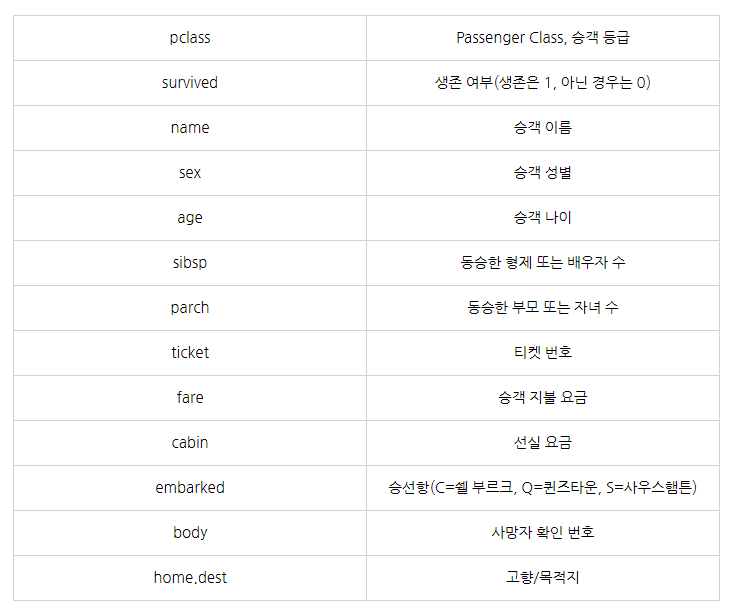